## Kaitlyn's Analysis

---

### Overall question: How do gamers compare with one another on levels of anxiety, satisfaction with life, and social phobia?

#### Kaitlyn's questions: 
##### - Does the preferred playstyled of a game have an effect on anxiety, satisfaction with life, and social phobia?
##### - Does amount of hours played per week have an effect on anxiety, satisfaction with life, and social phobia?

In [1]:
# dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import ttest_ind
import numpy as np

# file path
full_data_csv = Path('../data_cleanup/Gaming.csv')

# read file
full_data_df = pd.read_csv(full_data_csv)

# preview dataframe
full_data_df.head()

,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


### Part 1: Preferred Playstyle Influence on Mental Health

In [2]:
# drop columns that are not of interest
playstyle_df = full_data_df.drop(columns = [
    'Unnamed: 0', 'Game', 'Gender', 'Age', 'Residence', 
    'Birthplace', 'Work', 'Degree', 'Gaming Motivation', 
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1','SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 
    'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 
    'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'
    ])

# display dataframe
playstyle_df.head()

,Entry,Hours per Week,Playstyle,GAD Total,SWL Total,SPIN Total
0,1,15,Singleplayer,1,23,5
1,2,8,Multiplayer - online - with strangers,8,16,33
2,3,0,Singleplayer,8,17,31
3,4,20,Multiplayer - online - with online acquaintanc...,0,17,11
4,5,20,Multiplayer - online - with strangers,14,14,13


In [3]:
# display all unique entries in 'Playstyle' column
playstyle_df['Playstyle'].unique().tolist()

['Singleplayer',
 'Multiplayer - online - with strangers',
 'Multiplayer - online - with online acquaintances or teammates',
 'Multiplayer - online - with real life friends',
 'Multiplayer - offline (people in the same room)',
 'all of the above',
 'Multiplayer - Online - With real friends, and with online acquaintances, and strangers',
 'With strangers and friends',
 'Singleplayer - online',
 'watching',
 'Multiplayer - online with friends, teammates and strangers',
 'Sometimes alone (Ranked), sometimes with friends. Everytime there are strangers in my game ofc',
 'Multiplayer online, with friends (sometimes in the same room), sometimes with strangers.',
 'I prefer playing with RLF but I also play it to make a living.',
 'Multiplayer - online with online team mates and real life friends',
 'Mutliplayer - A mix of friends/strangers.',
 'Multiplayer - online - with real life friends and strangers',
 'Play solo but in skype call with friends',
 'mix of real life friends and online acquai

In [4]:
# categorize as only 'singleplayer' or 'multiplayer'
def categorize_playstyle(style: str) -> str:
    style = style.lower()
    if "multiplayer" in style:
        return "multiplayer"
    elif "singleplayer" in style:
        return "singleplayer"
    else:
        return None

playstyle_df['xPlaystyle'] = playstyle_df.apply(lambda row: categorize_playstyle(row['Playstyle']), axis=1)

# drop null columns
playstyle_df.dropna()

# display dataframe
playstyle_df.head()

,Entry,Hours per Week,Playstyle,GAD Total,SWL Total,SPIN Total,xPlaystyle
0,1,15,Singleplayer,1,23,5,singleplayer
1,2,8,Multiplayer - online - with strangers,8,16,33,multiplayer
2,3,0,Singleplayer,8,17,31,singleplayer
3,4,20,Multiplayer - online - with online acquaintanc...,0,17,11,multiplayer
4,5,20,Multiplayer - online - with strangers,14,14,13,multiplayer


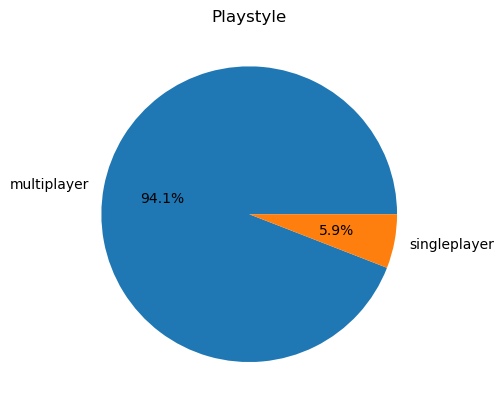

In [5]:
# create pie chart to visualize player distribution

# assign variables
playstyle_counts = playstyle_df['xPlaystyle'].value_counts()

# create pie plot
plt.title('Playstyle')
plt.pie(
        playstyle_counts, 
        labels=playstyle_counts.index, 
        autopct='%1.1f%%', 
        startangle=0
)

plt.savefig('../playstyle_pie')
plt.show()

In [6]:
# make new dataframe with averages of each score by playstyle
cols = ['xPlaystyle', 'GAD Total', 'SWL Total', 'SPIN Total']
playstyle_mean_df = playstyle_df[cols].groupby(['xPlaystyle']).mean()
playstyle_mean_df = playstyle_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
playstyle_mean_df

,xPlaystyle,GAD Avg,SWL Avg,SPIN Avg
0,multiplayer,5.129767,19.904026,19.440958
1,singleplayer,5.835385,18.583077,22.270769


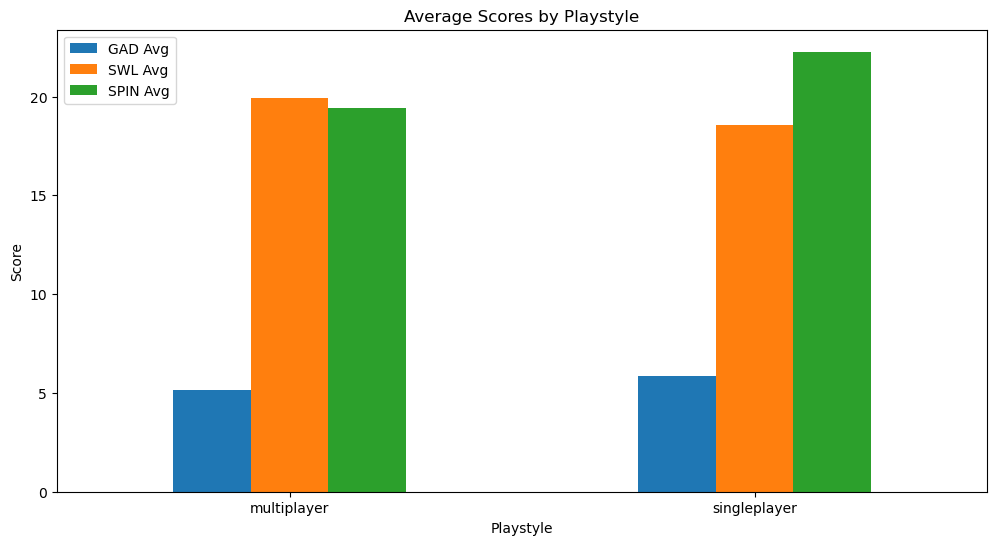

In [7]:
# create bar graph displaying avg scores by playstyle
cols_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']

playstyle_mean_df.plot(
    x='xPlaystyle',
    y=['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind='bar', 
    figsize=(12,6), 
    xlabel='Playstyle', 
    ylabel='Score', 
    title='Average Scores by Playstyle', 
    rot=0
);

plt.savefig('../playstyle_bar_all')

### Determining significance between singleplayer and multiplayer scores

In [8]:
# significance of SWL scores between playstyles
singleplayer_swl = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_swl = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']

ttest_ind(singleplayer_swl['SWL Total'], multiplayer_swl['SWL Total'])

TtestResult(statistic=-4.536244068287213, pvalue=5.787079882751451e-06, df=11005.0)

In [9]:
# significance of SPIN scores between playstyles
singleplayer_spin = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_spin = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']

ttest_ind(singleplayer_spin['SPIN Total'], multiplayer_spin['SPIN Total'])

TtestResult(statistic=5.221282847874713, pvalue=1.8092883169535443e-07, df=11005.0)

In [10]:
# make a dataframe with equal sample sizes of singleplayer and multiplayer
playstyle_single_df = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']

playstyle_multi_df = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer'] \
    .sample(n=playstyle_single_df.shape[0], random_state=1)

playstyle_sampled_df = pd.concat([playstyle_single_df, playstyle_multi_df])
cols = ['xPlaystyle', 'GAD Total', 'SWL Total', 'SPIN Total']
playstyle_sampled_mean_df = playstyle_sampled_df[cols].groupby(['xPlaystyle']).mean()
playstyle_sampled_mean_df = playstyle_sampled_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
playstyle_sampled_mean_df

,xPlaystyle,GAD Avg,SWL Avg,SPIN Avg
0,multiplayer,5.201538,19.540000,20.755385
1,singleplayer,5.835385,18.583077,22.270769


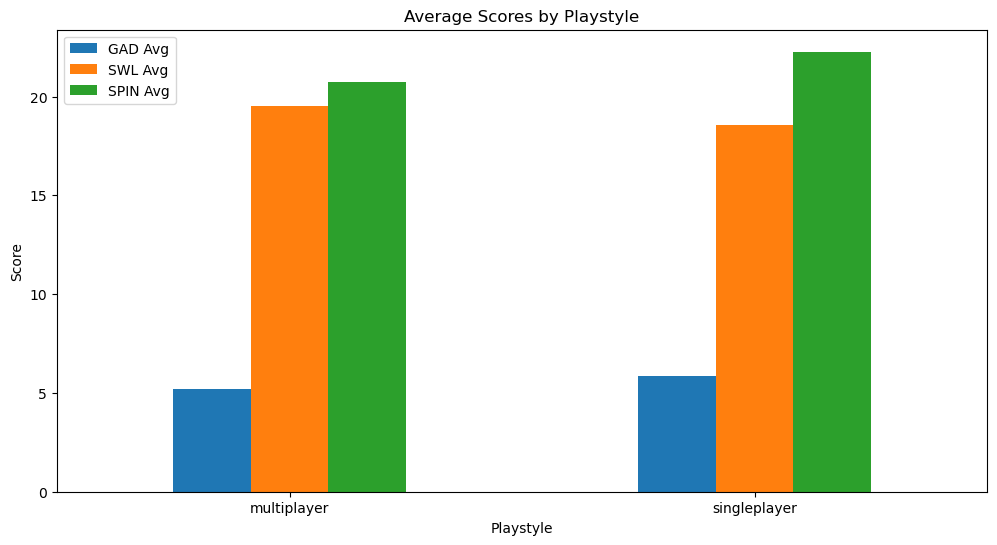

In [11]:
# make new bar graph displaying the same
cols_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']

playstyle_sampled_mean_df.plot(
    x='xPlaystyle',
    y=['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind='bar', 
    figsize=(12,6), 
    xlabel='Playstyle', 
    ylabel='Score', 
    title='Average Scores by Playstyle', 
    rot=0
);

plt.savefig('../playstyle_bar_equal')

In [13]:
# statistical significance of GAD scores between playstyles
gad_singleplayer = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
gad_multiplayer = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
gad_playstyle_ttest = ttest_ind(gad_singleplayer['GAD Total'], gad_multiplayer['GAD Total'])

# statistical significance of SWL scores between playstyles
swl_singleplayer = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
swl_multiplayer = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
swl_playstyle_ttest = ttest_ind(swl_singleplayer['SWL Total'], swl_multiplayer['SWL Total'])

# statistical significance of SPIN scores between playstyles
spin_singleplayer = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
spin_multiplayer = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
spin_playstyle_ttest = ttest_ind(spin_singleplayer['SPIN Total'], spin_multiplayer['SPIN Total'])

print(f'The statistical significance for GAD scores between playstyles is: {gad_playstyle_ttest}')
print(f'The statistical significance for SWL scores between playstyles is: {swl_playstyle_ttest}')
print(f'The statistical significance for SPIN scores between playstyles is: {spin_playstyle_ttest}')

The statistical significance for GAD scores between playstyles is: TtestResult(statistic=3.7255375632044907, pvalue=0.0001958741384608629, df=11005.0)
The statistical significance for SWL scores between playstyles is: TtestResult(statistic=-4.536244068287213, pvalue=5.787079882751451e-06, df=11005.0)
The statistical significance for SPIN scores between playstyles is: TtestResult(statistic=5.221282847874713, pvalue=1.8092883169535443e-07, df=11005.0)


### Part 2: Hours Played Influence on Mental Health

In [14]:
# drop columns that are not of interest
hours_df = full_data_df.drop(columns = [
    'Unnamed: 0', 'Game', 'Gender', 'Age', 'Residence', 
    'Birthplace', 'Work', 'Degree', 'Gaming Motivation', 'Playstyle',
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1','SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 
    'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 
    'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'
    ])

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total
0,1,15,1,23,5
1,2,8,8,16,33
2,3,0,8,17,31
3,4,20,0,17,11
4,5,20,14,14,13


In [15]:
# find minimum hours per week played
hours_df['Hours per Week'].min()

0

In [16]:
# find maximum hours per week played
hours_df['Hours per Week'].max()

140

In [17]:
# create bins for hours played
bins = [0, 20, 40, 60, 80, 140]

# create names for bins
hour_ranges = ['0 to 20', '21 to 40', '41 to 60', '61 to 80', '80+']

In [18]:
# slice data and place into bins
hours_df['Hours per Week Range'] = pd.cut(hours_df['Hours per Week'], 
                                          bins, labels=hour_ranges, 
                                          include_lowest=True)

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total,Hours per Week Range
0,1,15,1,23,5,0 to 20
1,2,8,8,16,33,0 to 20
2,3,0,8,17,31,0 to 20
3,4,20,0,17,11,0 to 20
4,5,20,14,14,13,0 to 20


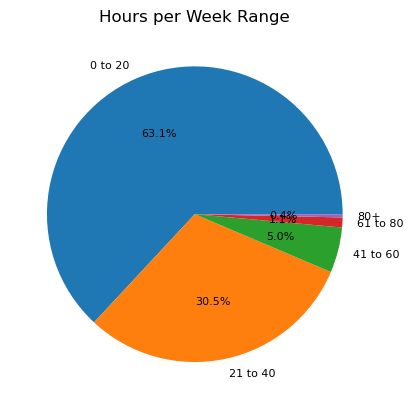

In [19]:
# create pie chart to visualize hours played

# assign variables
hours_counts = hours_df['Hours per Week Range'].value_counts()

# create pie plot
plt.title('Hours per Week Range')
plt.pie(
    hours_counts, 
    labels=hours_counts.index, 
    autopct='%1.1f%%', 
    startangle=0,
    textprops={'fontsize': 8}
)

# display figure
plt.savefig('../hours_pie')
plt.show()

In [20]:
# make new dataframe with averages of each score by hours played per week
cols_2 = ['Hours per Week Range', 'GAD Total', 'SWL Total', 'SPIN Total']
hours_mean_df = hours_df[cols_2].groupby(['Hours per Week Range']).mean()
hours_mean_df = hours_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
hours_mean_df

C:\Users\huynh\AppData\Local\Temp\ipykernel_15888\797604800.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_mean_df = hours_df[cols_2].groupby(['Hours per Week Range']).mean()


,Hours per Week Range,GAD Avg,SWL Avg,SPIN Avg
0,0 to 20,4.919846,20.421839,18.695473
1,21 to 40,5.364785,19.164903,20.644033
2,41 to 60,6.413043,17.465580,22.952899
3,61 to 80,6.859504,16.429752,23.595041
4,80+,8.128205,15.666667,25.538462


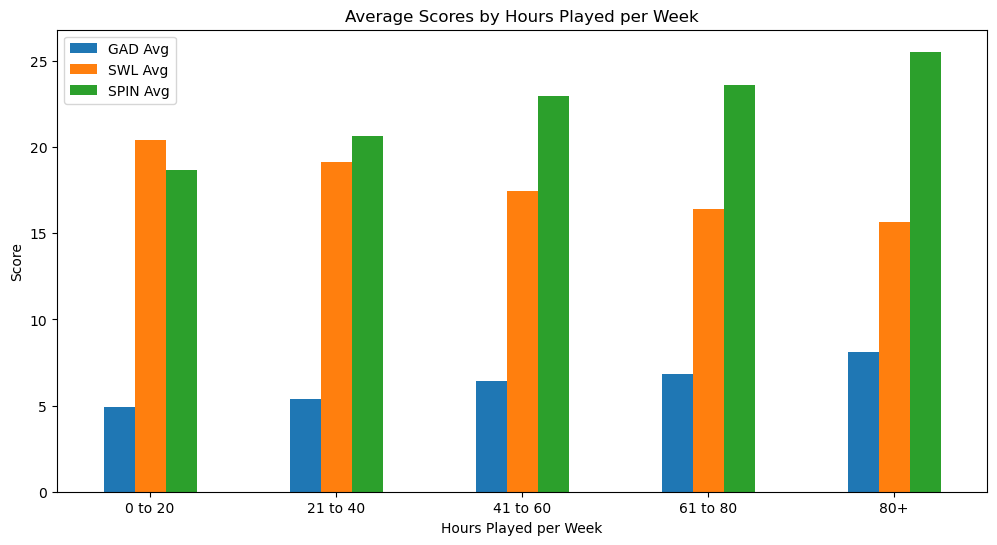

In [21]:
# create bar graph displaying avg scores by hours played per week
cols_2_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']

hours_mean_df.plot(
    x='Hours per Week Range',
    y=['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind='bar', 
    figsize=(12,6), 
    xlabel='Hours Played per Week', 
    ylabel='Score', 
    title='Average Scores by Hours Played per Week', 
    rot=0
);

plt.savefig('../hours_bar')

In [ ]:
# statistical significance of GAD scores between lower and higher hours played
gad_low_hr = playstyle_df[(playstyle_df['Hours per Week'] < 41)]
gad_high_hr = playstyle_df[(playstyle_df['Hours per Week'] > 80)]
gad_hours_ttest = ttest_ind(gad_low_hr['GAD Total'], gad_high_hr['GAD Total'])

# statistical significance of SWL scores between lower and higher hours played
swl_low_hr = playstyle_df[(playstyle_df['Hours per Week'] < 41)]
swl_high_hr = playstyle_df[(playstyle_df['Hours per Week'] > 80)]
swl_hours_ttest = ttest_ind(swl_low_hr['SWL Total'], swl_high_hr['SWL Total'])

# statistical significance of SPIN scores between lowest and highest hours played
spin_low_hr = playstyle_df[(playstyle_df['Hours per Week'] < 41)]
spin_high_hr = playstyle_df[(playstyle_df['Hours per Week'] > 80)]
spin_hours_ttest = ttest_ind(spin_low_hr['SPIN Total'], spin_high_hr['SPIN Total'])

print(f'The statistical significance for GAD scores between lower and higher hours played is: {gad_hours_ttest}')
print(f'The statistical significance for SWL scores between lower and higher hours played is: {swl_hours_ttest}')
print(f'The statistical significance for SPIN scores between lower and higher hours played is: {spin_hours_ttest}')

The statistical significance for GAD scores between lower and higher hours played is: TtestResult(statistic=-4.138338914224453, pvalue=3.525693551892109e-05, df=10463.0)
The statistical significance for SWL scores between lower and higher hours played is: TtestResult(statistic=3.798955168597751, pvalue=0.00014613012197260133, df=10463.0)
The statistical significance for SPIN scores between lower and higher hours played is: TtestResult(statistic=-2.9211250831649433, pvalue=0.003495150650168275, df=10463.0)
